# hypo-2 노령화 지수가 높은 곳일수록 전통시장, 공원 등 주요 문화시설이 많을 것이다.

## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import googlemaps
import seaborn as sns
from matplotlib import rc 
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
old_point = pd.read_excel('./data/자치구별+노령화지수(추계인구)_20240929181758.xlsx')
old_point.head()

,자치구별(1),자치구별(2),2023,2023.1,2023.2
0,자치구별(1),자치구별(2),합계,남자,여자
1,합계,소계,199.1,171.6,228.2
2,NaN,종로구,267.8,237.3,298
3,NaN,중구,286.5,245.3,329.3
4,NaN,용산구,200.7,172.2,230


In [3]:
old_point.drop(index=[0, 1], columns=["자치구별(1)"], inplace=True)
old_point.columns = ['구별', '합계', '남자', '여자']
old_point.reset_index(drop=True, inplace=True)
old_point.head()

,구별,합계,남자,여자
0,종로구,267.8,237.3,298
1,중구,286.5,245.3,329.3
2,용산구,200.7,172.2,230
3,성동구,193.4,167.5,219.9
4,광진구,211.1,183.7,240.1


In [4]:
park = pd.read_csv('./data/KC_ODSN_WALK_RECOMEND_LIST_2023.csv')
park.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
0,KCOWRPO23N000000001,쇼핑시설,쇼핑시설_전통시장,원미부흥시장,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100101180000000000,0.0,14571.0,0.0,37.553516,126.921715,공공데이터,상설장,20231231,20231231
1,KCOWRPO23N000000002,쇼핑시설,쇼핑시설_전통시장,원미종합시장,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100100970000000000,0.0,14568.0,0.0,37.545392,126.953319,공공데이터,상설장,20231231,20231231
2,KCOWRPO23N000000003,자연,자연_공원,원미별빛,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100101270000000000,0.0,14571.0,0.0,37.491966,126.787309,공공데이터,-,20231231,20231231
3,KCOWRPO23N000000004,자연,자연_공원,원미,41,경기도,41190,부천시 원미구,4119010100,원미동,...,4119510100100150000000000,0.0,14659.0,0.0,37.497985,126.799040,공공데이터,-,20231231,20231231
4,KCOWRPO23N000000005,쇼핑시설,쇼핑시설_전통시장,음성시장,43,충청북도,43770,음성군,4377025021,읍내리,...,4377025021102490000000000,0.0,27697.0,0.0,36.938166,127.692127,공공데이터,5일장,20231231,20231231


In [5]:
culture = pd.read_csv('./data/KC_485_DMSTC_MCST_OLDLSR_2023.csv')
culture.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
0,KC485PC23N000000000001,문화시설,복지관,1004가족복지센터,전라북도,익산시,5214011400,모현동1가,5214061000,모현동,...,126.946306,35.949725,NaN,NaN,9.500649e+05,1.772699e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
1,KC485PC23N000000000002,문화시설,복지관,1004가족재가복지센터,경기도,화성시,4159025325,봉담읍 와우리,4159025300,봉담읍,...,126.972771,37.215112,NaN,NaN,9.532215e+05,1.913051e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
2,KC485PC23N000000000003,문화시설,복지관,1004엔젤스방문요양센터,경기도,고양시 일산서구,4128710500,덕이동,4128760000,덕이동,...,126.751049,37.699774,NaN,NaN,9.339764e+05,1.966954e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
3,KC485PC23N000000000004,문화시설,복지관,100세고성재가복지센터,경상남도,고성군,4882025021,고성읍 성내리,4882025000,고성읍,...,128.321049,34.974063,NaN,NaN,1.074947e+06,1.664660e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
4,KC485PC23N000000000005,문화시설,복지관,100세노인복지센터,경상남도,진주시,4817012500,신안동,4817071500,신안동,...,128.071955,35.185477,NaN,NaN,1.052074e+06,1.687947e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


## preprocessing

### culture

In [10]:
culture_seoul = culture[culture['CTPRVN_NM'].str.contains('서울')]
culture_seoul.head()

,ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,ADSTRD_CD,ADSTRD_NM,...,FCLTY_LO,FCLTY_LA,OPER_INSTT_NM,TEL_NO,LC_LO,LC_LA,LAST_CHG_DE,ORIGIN_NM,FILE_NM,BASE_DE
17,KC485PC23N000000000018,문화시설,복지관,1318상상발전소,서울특별시,중랑구,1126010400,묵동,1126063000,묵2동,...,127.077072,37.606135,NaN,NaN,962670.272236,1.956385e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
18,KC485PC23N000000000019,문화시설,복지관,1318해피존,서울특별시,용산구,1117012800,한강로3가,1117062500,한강로동,...,126.956555,37.531929,NaN,NaN,951985.086624,1.948207e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
29,KC485PC23N000000000030,문화시설,복지관,153재가장기요양기관,서울특별시,중랑구,1126010100,면목동,1126057000,면목7동,...,127.083549,37.578477,NaN,NaN,963228.320845,1.953314e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
71,KC485PC23N000000000072,문화시설,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,1150010400,가양동,1150060400,가양2동,...,126.856279,37.564612,NaN,NaN,943150.174500,1.951889e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231
102,KC485PC23N000000000103,문화시설,복지관,99팔팔재가노인복지센터,서울특별시,강서구,1150010300,화곡동,1150059100,화곡6동,...,126.854230,37.554832,NaN,NaN,942961.762211,1.950805e+06,20240906,KT,KC_485_DMSTC_MCST_OLDLSR_2023,20231231


In [11]:
culture_seoul.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",
                        'BASE_DE', 'LCLAS_NM', 'ADSTRD_CD', 'LEGALDONG_NM', 'RDNMADR_CD', 'ADSTRD_NM', 'GID_CD', 
                        "ZIP_NO", "LC_LO", "LC_LA"], inplace=True)
culture_seoul.reset_index(drop=True, inplace=True)
culture_seoul.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_3190/94473864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  culture_seoul.drop(columns=['ID', 'LEGALDONG_CD', 'OPER_INSTT_NM', 'TEL_NO', "ORIGIN_NM", "LAST_CHG_DE", "FILE_NM",


,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


In [13]:
culture_seoul['MLSFC_NM'].value_counts()

MLSFC_NM
노인정/노인회관    1492
복지관         1195
보육원/양로원      318
마을/새마을회관      51
Name: count, dtype: int64

### park_seoul

In [14]:
park_seoul = park[park['CTPRVN_NM'].str.contains('서울')]
park_seoul.head()

,ESNTL_ID,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_CD,CTPRVN_NM,SIGNGU_CD,SIGNGU_NM,LEGALDONG_CD,LEGALDONG_NM,...,BULD_MANAGE_CD,TEL_NO,ZIP_NO,HMPG_URL,FCLTY_LA,FCLTY_LO,ORIGIN_NM,ADIT_DC,UPDT_DT,REGIST_DT
34,KCOWRPO23N000000035,자연,자연_공원,효 성,11,서울특별시,11350,노원구,1135010300,공릉동,...,1135010300107420000000000,0.0,1804.0,0.0,37.621233,127.087753,공공데이터,-,20231231,20231231
35,KCOWRPO23N000000036,자연,자연_공원,등나무,11,서울특별시,11350,노원구,1135010600,중계동,...,1135010600105080000000000,0.0,1783.0,0.0,37.640661,127.066866,공공데이터,-,20231231,20231231
36,KCOWRPO23N000000037,자연,자연_공원,마들,0,서울,0,노원구,0,상계동,...,NaN,0.0,14567.0,0.0,37.644873,127.058305,공공데이터,-,20231231,20231231
37,KCOWRPO23N000000038,자연,자연_공원,매 봉,11,서울특별시,11350,노원구,1135010200,월계동,...,1135010200103200000000000,0.0,1865.0,0.0,37.633234,127.059006,공공데이터,-,20231231,20231231
38,KCOWRPO23N000000039,자연,자연_공원,벼 루,11,서울특별시,11350,노원구,1135010200,월계동,...,1135010200104970000000000,0.0,1890.0,0.0,37.619240,127.056545,공공데이터,-,20231231,20231231


In [22]:
park_seoul.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',
                        'LEGALDONG_NM', 'ADDR_ENG_NM', 'ADSTRD_CD', 'BULD_NM', 'BULD_MANAGE_CD', 'HMPG_URL', 'ORIGIN_NM', 'ADIT_DC',
                        'UPDT_DT', 'REGIST_DT'], inplace=True)
park_seoul.reset_index(drop=True, inplace=True)
park_seoul.head()

/var/folders/76/295r32t542b3jtvsn34n34s00000gn/T/ipykernel_3190/1989510625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_seoul.drop(columns=['ESNTL_ID', 'CTPRVN_CD', 'SIGNGU_CD', 'LEGALDONG_CD', 'ROAD_NM_CD' , 'TEL_NO', 'ZIP_NO',


,LCLAS_NM,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,FCLTY_ROAD_NM_ADDR,LNM_ADDR,FCLTY_LA,FCLTY_LO
0,자연,자연_공원,효 성,서울특별시,노원구,"서울특별시 노원구 화랑로 556 (공릉동, 효성아파트)",서울특별시 노원구 공릉동 742 효성아파트,37.621233,127.087753
1,자연,자연_공원,등나무,서울특별시,노원구,서울특별시 노원구 동일로 1238 (중계동),서울특별시 노원구 중계동 508 서울시립 북서울미술관,37.640661,127.066866
2,자연,자연_공원,마들,서울,노원구,서울특별시 노원구 덕릉로 450,서울 노원구 상계동 770-2,37.644873,127.058305
3,자연,자연_공원,매 봉,서울특별시,노원구,서울특별시 노원구 월계로55길 49 (월계동),서울특별시 노원구 월계동 320-6,37.633234,127.059006
4,자연,자연_공원,벼 루,서울특별시,노원구,서울특별시 노원구 광운로1길 24 (월계동),서울특별시 노원구 월계동 500 광운중/광운인공지능고등학교,37.619240,127.056545


In [23]:
park_seoul['MLSFC_NM'].value_counts()

MLSFC_NM
자연_공원        1621
쇼핑시설_전통시장     219
무장애_나눔길         3
Name: count, dtype: int64

## visualization

In [27]:
culture_seoul.head()

,MLSFC_NM,FCLTY_NM,CTPRVN_NM,SIGNGU_NM,RDNMADR_NM,FCLTY_LO,FCLTY_LA
0,복지관,1318상상발전소,서울특별시,중랑구,서울특별시 중랑구 묵동 중랑역로 142,127.077072,37.606135
1,복지관,1318해피존,서울특별시,용산구,서울특별시 용산구 한강로3가 청파로 46,126.956555,37.531929
2,복지관,153재가장기요양기관,서울특별시,중랑구,서울특별시 중랑구 면목동 사가정로46가길 3-5,127.083549,37.578477
3,노인정/노인회관,3단지아파트노인정,서울특별시,강서구,서울특별시 강서구 가양동 허준로 139,126.856279,37.564612
4,복지관,99팔팔재가노인복지센터,서울특별시,강서구,서울특별시 강서구 화곡동 공항대로 426,126.854230,37.554832


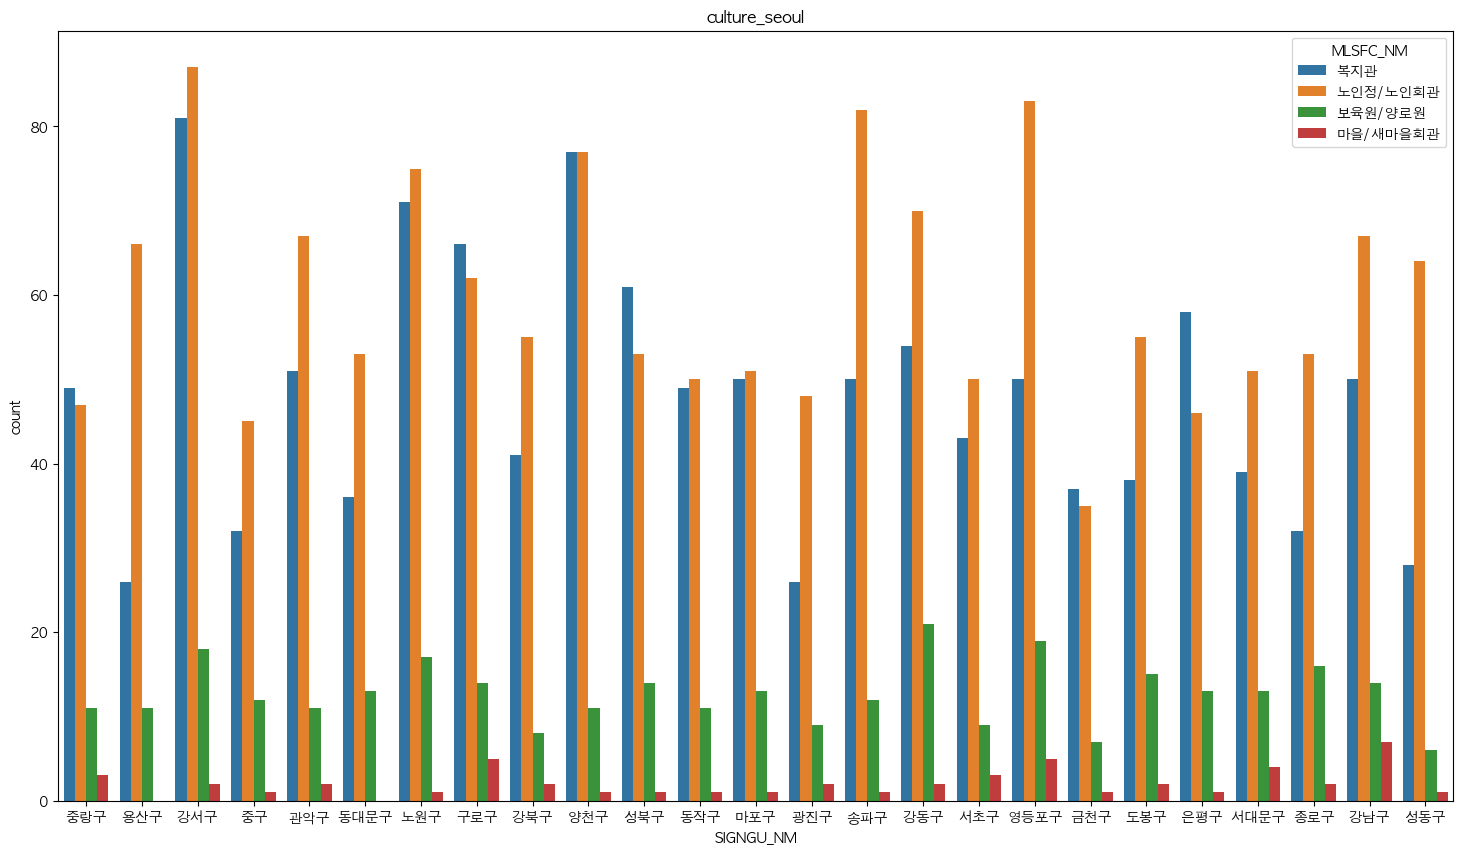

In [30]:
plt.figure(figsize=(18, 10))
sns.countplot(data=culture_seoul, x='SIGNGU_NM', hue='MLSFC_NM')
plt.title("culture_seoul")
plt.show()

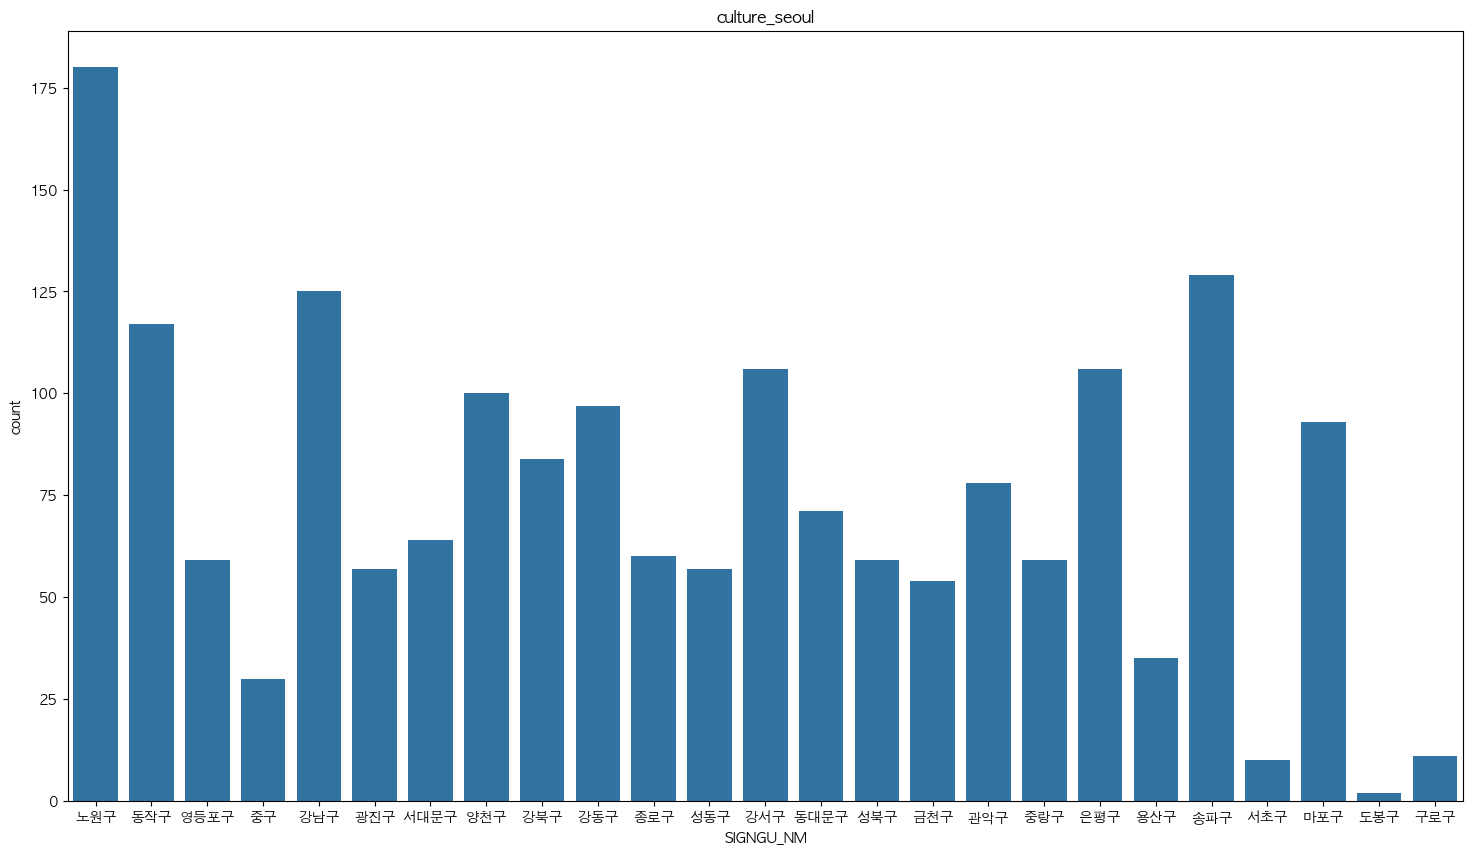

In [32]:
plt.figure(figsize=(18, 10))
sns.countplot(data=park_seoul, x='SIGNGU_NM')
plt.title("culture_seoul")
plt.show()